<a href="https://colab.research.google.com/github/JoshRome/ai_course/blob/master/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1: Get Random Data.


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [0]:
def get_random_data(w, b, mu, sigma, m):
  '''
  Generates random feature data that uses the 1st feature as added noise

  @returns: data, lables as a np.array
  '''
  ## We use flatten() to accuratly represent normal distribution and it
  ## doesnt break the code with out of bound values !!
   
  # Gets random data with a 50-50 chance of either
  labels = np.zeros(shape = (m, 1))
  labels[:, 0]= np.random.choice([0,1], size = (m,1), p = [.5, .5]).flatten()

  # Grabs data uniformly
  data = np.zeros( shape = (m, 2))
  data[:, 0] = np.random.uniform(size = (m,1)).flatten()

  # Norm Dist 1d array
  n = np.random.normal(mu, sigma, (m, 1)).flatten()

  # Create second feature with added noise
  data[:, 1] = w* data[:,0] + b + np.power(-1, labels).flatten() * n

  return data, labels

In [0]:
def display_random_data( data, labels ):

  # Reshape the data
  idx = labels.flatten()

  # Seperate the plots blue and red
  zero_data = data[idx == 0,:]
  plt.scatter(zero_data[:,0], zero_data[:,1], c = 'blue', label= 'Class 0')

  one_data = data[idx == 1,:]
  plt.scatter(one_data[:,0], one_data[:, 1], c = 'red', label = 'Class 1')

  # Labels
  plt.legend()
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  plt.show()

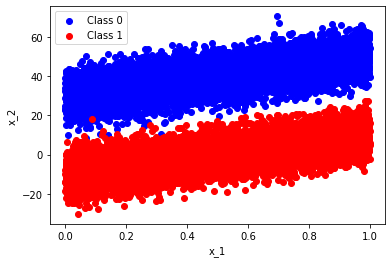

In [80]:
m = 20000
w = 20
b = 10
mu = 20
sigma = 6

data, labels = get_random_data(w, b, mu, sigma, m)

display_random_data(data, labels)

df = pd.DataFrame(data)
y = pd.DataFrame(labels)

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

#Problem 2: Keras Logistic Regression.

In [0]:
def logistic_model():
  model = tf.keras.models.Sequential()

  # Add a layer to the network
  model.add(tf.keras.layers.Dense(1, activation='sigmoid', input_shape = (2, )))

  model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

  return model

In [82]:
epochs = 250

batch_size = 128

# Creates the network
log_network = logistic_model()

# Fits the model
history = log_network.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))


Epoch 1/250
125/125 [==============================] - 0s 2ms/step - loss: 7.7850 - accuracy: 0.2753 - val_loss: 6.2158 - val_accuracy: 0.2935
Epoch 2/250
125/125 [==============================] - 0s 2ms/step - loss: 5.0558 - accuracy: 0.2743 - val_loss: 3.5987 - val_accuracy: 0.2910
Epoch 3/250
125/125 [==============================] - 0s 2ms/step - loss: 2.4145 - accuracy: 0.2695 - val_loss: 1.1788 - val_accuracy: 0.2763
Epoch 4/250
125/125 [==============================] - 0s 2ms/step - loss: 0.6231 - accuracy: 0.6322 - val_loss: 0.3790 - val_accuracy: 0.8048
Epoch 5/250
125/125 [==============================] - 0s 2ms/step - loss: 0.3321 - accuracy: 0.8266 - val_loss: 0.3265 - val_accuracy: 0.8295
Epoch 6/250
125/125 [==============================] - 0s 2ms/step - loss: 0.2925 - accuracy: 0.8684 - val_loss: 0.2891 - val_accuracy: 0.8765
Epoch 7/250
125/125 [==============================] - 0s 2ms/step - loss: 0.2589 - accuracy: 0.9079 - val_loss: 0.2564 - val_accuracy: 0.9047

In [0]:
def display (data, labels, p_w, p_b, w, b):
  # Reshapes the labels to make for easier comparison
  idx = labels.flatten()

  # Seperate and plot the data according to label
  zero_data = data[idx == 0,:]
  plt.scatter(zero_data[:,0], zero_data[:,1], c='blue', label='Class 0')

  one_data = data[idx == 1,:]
  plt.scatter(one_data[:,0], one_data[:,1], c='red', label='Class 1')

  x = np.linspace(0,1,100)

  py = p_w * x + p_b
  plt.plot(x, py, '-g', label='Prediction', linewidth = 4.0)

  y = w * x + b
 
  plt.plot(x, y, '-k', label='Actual', linewidth = 4.0)

  # Adds some descriptive elements and shows the plot
  plt.legend()
  plt.xlabel('$x_1$')
  plt.ylabel('$x_2$')
  plt.show()
  return

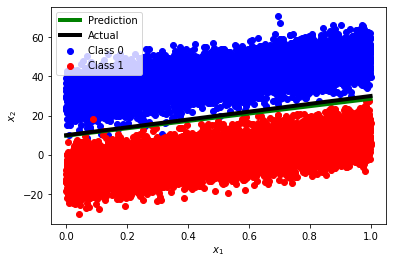

In [84]:

# Gets the weights of the network
weights = log_network.get_weights()
w1 = weights[0][0][0]
w2 = weights[0][1][0]
bias = weights[1][0]

# Calculates the predicted weight and bias term for the separating line
p_w = -w1/w2
p_b = -bias/w2

# Displays the data with the predicted and actual lines
display(data, labels, p_w, p_b, w, b)

In [0]:
def display_heatmap (model, p_w, p_b, x_min, x_max, y_min, y_max, accuracy):
  # We create the X & Y planes
  x = np.linspace(x_min, x_max, accuracy)
  y = np.linspace(y_min, y_max, accuracy)
  X, Y = np.meshgrid(x, y)

  # Create Z plane from previous data and flattens to keep in 
  # Normal distribution. 
  X_flat = X.flatten()
  Y_flat = Y.flatten()

  Z = np.column_stack((X_flat, Y_flat))
  Z = model.predict(Z)
  Z = Z.reshape((accuracy, accuracy))
  
  # Creates the plot within our parameter.
  fig = plt.figure()
  ax = plt.axes()

  # Create the heat map
  contours = ax.contourf(X, Y, Z, accuracy, cmap='RdBu_r')
  im = ax.imshow(Z, extent=[x_min, x_max, y_min, y_max], origin = 'lower', cmap='RdBu_r', alpha=0.5, aspect='auto')

  # Color bar key that shows range: [0,1]
  plt.colorbar(im, ax = ax)

  # Label the graph.
  ax.set_xlabel('$x_1$')
  ax.set_ylabel('$x_2$')
  plt.show()
  return

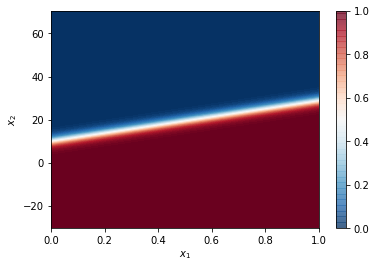

In [86]:
# Creates a heat map of the network~
y_min = min(data[:,1])
y_max = max(data[:,1])
accuracy = 100             
display_heatmap(log_network, p_w, p_b, 0, 1, y_min, y_max, accuracy)



#Problem 3:
Logistic regression predicts y^=b+w1x1+w2x2. It will be convenient to rewrite this as a dot product. Define w=(w0,w1,w2) and x=(1,x1,x2). Then, we have y^=w⋅x.

We can then plug this into the Sigmoid activation function


In [0]:
def data_preprocess(X_train, X_test, y_train, y_test):
  temp = np.array(X_train)
  train_label = np.array(y_train)

  train_data = np.column_stack((np.ones((temp.shape[0], 1)), temp))

  temp = np.array(X_test)
  test_label = np.array(y_test)

  test_data = np.column_stack((np.ones((temp.shape[0], 1)), temp))
  return train_data, train_label, test_data, test_label


In [0]:
def logistic_regression(X_train, X_test, y_train, y_test, epochs = 100, rate=0.1):
  train_data, train_label, test_data, test_label = data_preprocess(X_train, X_test, y_train, y_test)

  weights = np.zeros((train_data.shape[1], 1))

  for epoch in range(epochs):
    # Randomize selection
    m = train_data.shape[0]

    # Train each weight
    for data, label in zip(train_data, train_label):
      # Calculate summation of weights times features (linear regression)
      z = data.dot(weights)
      a_sig = 1 / (1 + np.exp(-z))

      # Calculate the gradient
      gradient = (1/m) * np.array([(a_sig - label) * data]).T
      weights -= (gradient * rate)
    
    # Calculate loss and accuracy after every epoch
    # NOTE: This only works for binary classification
    z = test_data.dot(weights)
    a_sig = 1 / (1 + np.exp(-z))
    tsize = test_label.shape[0]

    # Calculate Accuracy
    accuracy = 0
    for predict, actual in zip(a_sig, test_label):
      predicted = np.rint(predict)
      if predicted == actual:
        accuracy += (1/tsize)

    # Binary Cross-Entropy Loss calculation
    loss = ((-test_label * np.log(a_sig) - ((1 - test_label)* np.log(1-a_sig)))).sum()
    loss *= (1/tsize)

    print("Epoch {}/{}: Loss {:1.5f}, Accuracy {:1.5f}".format(epoch+1, epochs, loss, accuracy))

  def predict(data, weights):
    newdata = np.column_stack((np.ones((data.shape[0], 1)), data))
    z = newdata.dot(weights)
    a_sig = 1 / (1 + np.exp(-z))
    return a_sig

  return weights

Epoch 1/250: Loss 0.40592, Accuracy 0.74500
Epoch 2/250: Loss 0.39909, Accuracy 0.75175
Epoch 3/250: Loss 0.39228, Accuracy 0.76150
Epoch 4/250: Loss 0.38564, Accuracy 0.76850
Epoch 5/250: Loss 0.37919, Accuracy 0.77600
Epoch 6/250: Loss 0.37291, Accuracy 0.78325
Epoch 7/250: Loss 0.36681, Accuracy 0.79100
Epoch 8/250: Loss 0.36087, Accuracy 0.79600
Epoch 9/250: Loss 0.35510, Accuracy 0.80250
Epoch 10/250: Loss 0.34948, Accuracy 0.80950
Epoch 11/250: Loss 0.34401, Accuracy 0.81525
Epoch 12/250: Loss 0.33870, Accuracy 0.82025
Epoch 13/250: Loss 0.33352, Accuracy 0.82525
Epoch 14/250: Loss 0.32848, Accuracy 0.83000
Epoch 15/250: Loss 0.32357, Accuracy 0.83500
Epoch 16/250: Loss 0.31879, Accuracy 0.84125
Epoch 17/250: Loss 0.31414, Accuracy 0.84800
Epoch 18/250: Loss 0.30960, Accuracy 0.85250
Epoch 19/250: Loss 0.30519, Accuracy 0.85750
Epoch 20/250: Loss 0.30088, Accuracy 0.86325
Epoch 21/250: Loss 0.29669, Accuracy 0.86750
Epoch 22/250: Loss 0.29260, Accuracy 0.87225
Epoch 23/250: Loss 

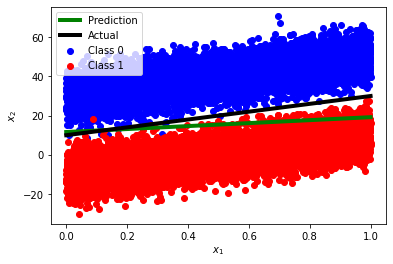

In [111]:
# Gets the weights of the network
weights = logistic_regression(X_train, X_test, y_train, y_test,epochs = 250)
w1 = weights[1]
w2 = weights[2]
bias = weights[0]

# Calculates the predicted weight and bias term for the separating line
p_w = -w1/w2
p_b = -bias/w2

py_1 = p_w + p_b

# Displays the data with the predicted and actual lines
display(data, labels, p_w, p_b, w, b)

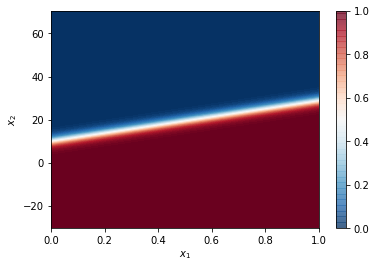

In [117]:
display_heatmap(log_network, p_w, p_b, 0, 1, y_min, y_max, accuracy)